In [2]:
import lightgbm

print(lightgbm.__version__)

2.1.0


### LightGBM 적용 – 위스콘신 Breast Cancer Prediction

In [3]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target


# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.614872
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.550424
[3]	valid_0's binary_logloss: 0.497095
[4]	valid_0's binary_logloss: 0.449481
[5]	valid_0's binary_logloss: 0.414368
[6]	valid_0's binary_logloss: 0.381005
[7]	valid_0's binary_logloss: 0.349425
[8]	valid_0's binary_logloss: 0.325225
[9]	valid_0's binary_logloss: 0.300915
[10]	valid_0's binary_logloss: 0.283436
[11]	valid_0's binary_logloss: 0.265498
[12]	valid_0's binary_logloss: 0.250054
[13]	valid_0's binary_logloss: 0.236562
[14]	valid_0's binary_logloss: 0.22509
[15]	valid_0's binary_logloss: 0.214741
[16]	valid_0's binary_logloss: 0.206876
[17]	valid_0's binary_logloss: 0.198085
[18]	valid_0's binary_logloss: 0.190907
[19]	valid_0's binary_logloss: 0.181494
[20]	valid_0's binary_logloss: 0.173462
[21]	valid_0's binary_logloss: 0.1672
[22]	valid_0's binary_logloss: 0.160914
[23]	valid_0's binary_logloss: 0.156162
[24]	valid_0's binary_logloss

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [6]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9933


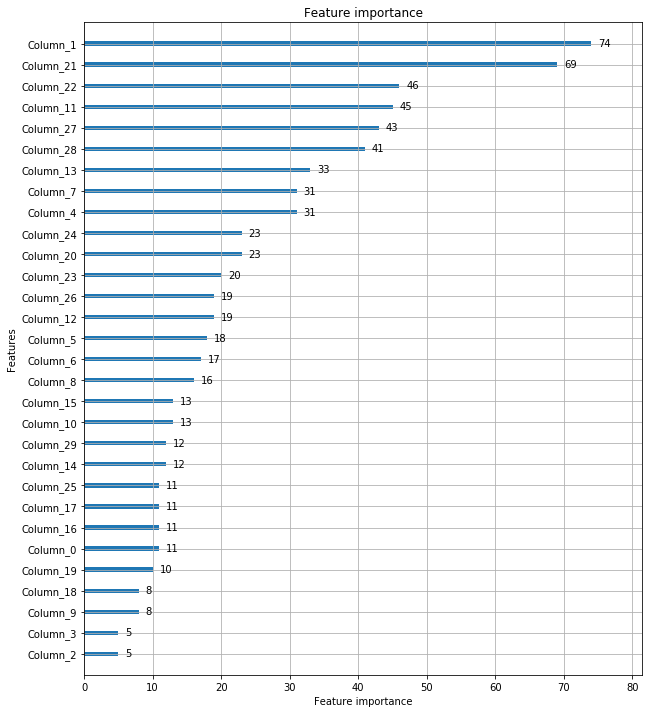

In [7]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(lgbm_wrapper, ax=ax)

In [ ]:
print(dataset.feature_names)